# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "0. city_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [101]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [102]:
# Call: URL for Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Lists to append data from API
city_name = []
city_lat = []
city_lon = []
city_maxtemperature = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
city_date = []

# Beginning: Print info
print(f"Beginning Data Retrieval")
print(f"-------------------------------------------------------------------")

#Loop - cities to get all info
cont = 1
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lon.append(response["coord"]["lon"])
        city_maxtemperature.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_cloudiness.append(response["clouds"]["all"])
        city_windspeed.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_cont = response["name"]
        print(f"Processing Record {cont} | {city_cont}")
        cont = cont + 1
               
    # SKIP to next, if no record is found 
    except:
        print("City not found. Skipping...")
    continue

# End: Print info   
print(f"------------------------------------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------------------------------------")


Beginning Data Retrieval
-------------------------------------------------------------------
Processing Record 1 | Airai
Processing Record 2 | Ucluelet
Processing Record 3 | Qaqortoq
Processing Record 4 | Rikitea
Processing Record 5 | Puerto Ayora
Processing Record 6 | Kununurra
Processing Record 7 | Cape Town
Processing Record 8 | Longyearbyen
Processing Record 9 | Bluff
Processing Record 10 | Frutal
Processing Record 11 | Hobart
Processing Record 12 | Busselton
Processing Record 13 | Pecos
Processing Record 14 | Clyde River
Processing Record 15 | Mahébourg
Processing Record 16 | Nanortalik
Processing Record 17 | ‘Ewa Beach
Processing Record 18 | Richards Bay
Processing Record 19 | Vaini
Processing Record 20 | Saint Paul Harbor
Processing Record 21 | Butaritari
Processing Record 22 | Yellowknife
Processing Record 23 | Juneau
Processing Record 24 | Porto-Novo
Processing Record 25 | Khatanga
Processing Record 26 | Ushuaia
Processing Record 27 | Carnarvon
Processing Record 28 | Saint Geo

Processing Record 233 | Ilhéus
Processing Record 234 | Tocopilla
Processing Record 235 | Oktyabr'skiy
Processing Record 236 | Oodweyne
City not found. Skipping...
Processing Record 237 | Dingle
Processing Record 238 | Shingū
City not found. Skipping...
Processing Record 239 | Houston
Processing Record 240 | Hofn
Processing Record 241 | Carutapera
City not found. Skipping...
Processing Record 242 | Cabo San Lucas
Processing Record 243 | Christchurch
Processing Record 244 | Port Hardy
Processing Record 245 | Abu Samrah
Processing Record 246 | Henderson
Processing Record 247 | Buala
Processing Record 248 | La Palma
Processing Record 249 | Nouakchott
Processing Record 250 | Buchanan
Processing Record 251 | Cascais
Processing Record 252 | Vyartsilya
Processing Record 253 | Imeni Stepana Razina
Processing Record 254 | Shirokiy
Processing Record 255 | Mountain Home
Processing Record 256 | Tessalit
Processing Record 257 | Coahuayana Viejo
Processing Record 258 | Zapolyarnyy
Processing Record 2

Processing Record 458 | Tsabong
Processing Record 459 | Vila
City not found. Skipping...
Processing Record 460 | Ambilobe
Processing Record 461 | Laguna
Processing Record 462 | Charleston
Processing Record 463 | Mazagão
Processing Record 464 | Cambrils
Processing Record 465 | Bahía Blanca
Processing Record 466 | Vanimo
Processing Record 467 | Sarangani
Processing Record 468 | Noumea
Processing Record 469 | Hohhot
Processing Record 470 | Shenjiamen
Processing Record 471 | Surgut
Processing Record 472 | Leningradskiy
Processing Record 473 | Adamantas
Processing Record 474 | Kavaratti
Processing Record 475 | Sangar
Processing Record 476 | Porto Torres
Processing Record 477 | Junín
Processing Record 478 | Pimentel
Processing Record 479 | Port Hueneme
Processing Record 480 | Ha Giang
Processing Record 481 | Padang
Processing Record 482 | Manicoré
Processing Record 483 | Marsh Harbour
Processing Record 484 | Itarema
Processing Record 485 | Hailar
Processing Record 486 | Hambantota
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [124]:
# Input for Dictionary
cityweather_dict = {
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lon,
    "Max Temp": city_maxtemperature,
    "Humidity": city_humidity,
    "Cloudiness": city_cloudiness,
    "WindSpeed": city_windspeed,
    "Country": city_country,
    "Date": city_date,
}

# Dataframe from Dictionary
city_data = pd.DataFrame(cityweather_dict)
city_data.to_csv(output_data_file)

# Dataframe head
city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Airai,-8.9266,125.4092,72.41,39,48,1.97,TL,1619490043
1,Ucluelet,48.9329,-125.5528,54.00,71,40,6.91,CA,1619490044
2,Qaqortoq,60.7167,-46.0333,35.60,93,75,5.75,GL,1619489961
3,Rikitea,-23.1203,-134.9692,78.13,72,100,6.98,PF,1619490044
4,Puerto Ayora,-0.7393,-90.3518,75.00,90,37,4.97,EC,1619490018


In [104]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,17.323085,16.628966,61.451496,69.695423,50.985915,7.133063,1.619490e+09
std,33.305439,90.264211,18.554892,22.172814,38.849547,4.891198,1.057143e+02
min,-54.800000,-175.200000,8.600000,6.000000,0.000000,0.270000,1.619490e+09
25%,-10.719200,-61.865300,50.000000,59.000000,11.000000,3.440000,1.619490e+09
50%,19.166700,20.833350,63.170000,74.000000,48.000000,5.750000,1.619490e+09
75%,44.356100,100.340125,77.000000,87.000000,90.000000,9.492500,1.619490e+09
max,78.218600,179.316700,93.760000,100.000000,100.000000,27.220000,1.619490e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,17.323085,16.628966,61.451496,69.695423,50.985915,7.133063,1.619490e+09
std,33.305439,90.264211,18.554892,22.172814,38.849547,4.891198,1.057143e+02
min,-54.800000,-175.200000,8.600000,6.000000,0.000000,0.270000,1.619490e+09
25%,-10.719200,-61.865300,50.000000,59.000000,11.000000,3.440000,1.619490e+09
50%,19.166700,20.833350,63.170000,74.000000,48.000000,5.750000,1.619490e+09
75%,44.356100,100.340125,77.000000,87.000000,90.000000,9.492500,1.619490e+09
max,78.218600,179.316700,93.760000,100.000000,100.000000,27.220000,1.619490e+09


In [106]:
#  Get the indices of cities that have humidity over 100%.
print(f"------------------------------------------------------------------")
print(f"No cities beyond of 100% of humidity")
print(f"------------------------------------------------------------------")

------------------------------------------------------------------
No cities beyond of 100% of humidity
------------------------------------------------------------------


In [107]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Airai,-8.9266,125.4092,72.41,39,48,1.97,TL,1619490043
1,Ucluelet,48.9329,-125.5528,54.00,71,40,6.91,CA,1619490044
2,Qaqortoq,60.7167,-46.0333,35.60,93,75,5.75,GL,1619489961
3,Rikitea,-23.1203,-134.9692,78.13,72,100,6.98,PF,1619490044
4,Puerto Ayora,-0.7393,-90.3518,75.00,90,37,4.97,EC,1619490018


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

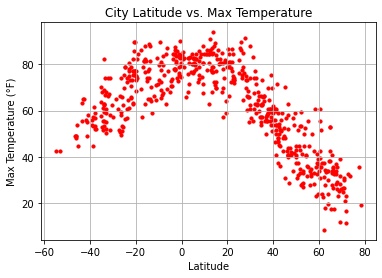

In [108]:
#Scatter plot for for Latitude and Max Temp
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", s=10, c='red')
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

#Chart Image
plt.savefig("1. Max_Temp_vs_Latitude.png")

# Plot: Max Temperature and Latitude
plt.show()

## Latitude vs. Humidity Plot

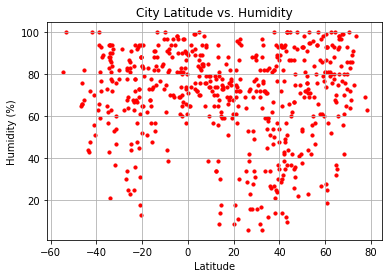

In [109]:
# Scatter plot for for Latitude and Humidity
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", s=10, c='red')
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Chart Image
plt.savefig("2. Humidity_vs_Latitude.png")

# Plot: Humidity  and Latitude
plt.show()

## Latitude vs. Cloudiness Plot

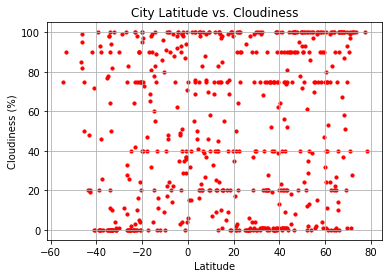

In [110]:
# Scatter plot for for Latitude and Cloudiness
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", s=10, c='red')
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Chart Image
plt.savefig("3. Cloudiness_vs_Latitude.png")

# Plot: Cloudiness  and Latitude
plt.show()

## Latitude vs. Wind Speed Plot

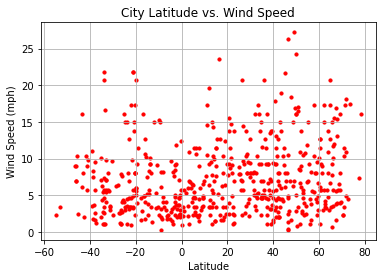

In [111]:
# Scatter plot for for Latitude and Wind Speed
plt.scatter(city_data["Lat"], city_data["WindSpeed"], marker="o", s=10, c='red')
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Chart Image
plt.savefig("4. Wind_Speed_vs_Latitude.png")

# Plot: Cloudiness  and Wind Speed
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.81154525880829


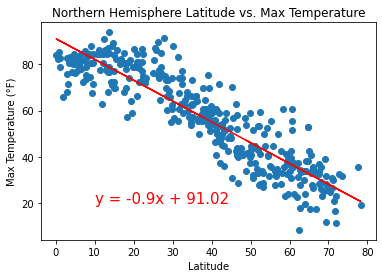

In [112]:
# Scatter plot for for Latitude and Max Temp (Northern Hemisphere) with Linear Regression

NortherHem_data = city_data.loc[city_data["Lat"] > 0, [
    "Lat", "Max Temp"]]

x_values = NortherHem_data["Lat"]
y_values = NortherHem_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
#Chart Image
plt.savefig("5. NH_MaxTemp_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5296122137948776


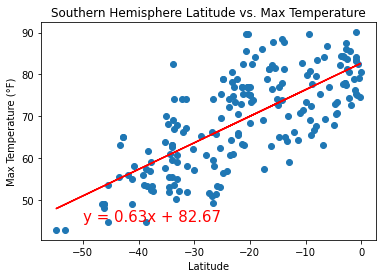

In [113]:
#Scatter plot for for Latitude and Max Temp (Southern Hemisphere) with Linear Regression

SouthernHem_data = city_data.loc[city_data["Lat"] < 0, [
    "Lat", "Max Temp"]]

x_values = SouthernHem_data["Lat"]
y_values = SouthernHem_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

#Chart Image
plt.savefig("6. SH_MaxTemp_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004638013347130868


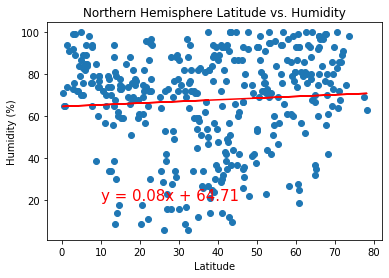

In [114]:
#Scatter plot for for Latitude and Humidity (Northern Hemisphere) with Linear Regression

NortherHem_data = city_data.loc[city_data["Lat"] > 0, [
    "Lat", "Humidity"]]


x_values = NortherHem_data["Lat"]
y_values = NortherHem_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

#Chart Image
plt.savefig("7. NH_Humidity_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024827444997032613


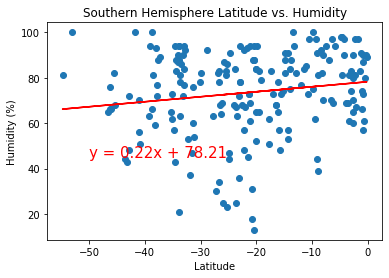

In [115]:
#Scatter plot for for Latitude and Humidity (Southern Hemisphere) with Linear Regression
SouthernHem_data = city_data.loc[city_data["Lat"] < 0, [
    "Lat", "Humidity"]]


x_values = SouthernHem_data["Lat"]
y_values = SouthernHem_data["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

#Chart Image
plt.savefig("8. SH_Humidity_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015280461971166323


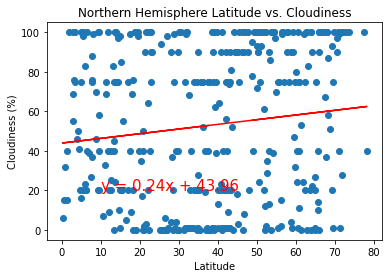

In [116]:
#Scatter plot for for Latitude and Cloudiness (Northern Hemisphere) with Linear Regression

NortherHem_data = city_data.loc[city_data["Lat"] > 0, [
    "Lat", "Cloudiness"]]


x_values = NortherHem_data["Lat"]
y_values = NortherHem_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

#Chart Image
plt.savefig("9. NH_Cloudiness_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.023359185492369417


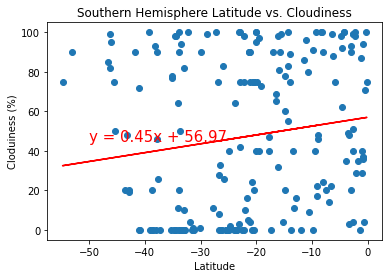

In [117]:
#Scatter plot for for Latitude and Cloudiness (Southern Hemisphere) with Linear Regression
SouthernHem_data = city_data.loc[city_data["Lat"] < 0, [
    "Lat", "Cloudiness"]]


x_values = SouthernHem_data["Lat"]
y_values = SouthernHem_data["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloduiness (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

#Chart Image
plt.savefig("10. SH_Cloudiness_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02211217950692863


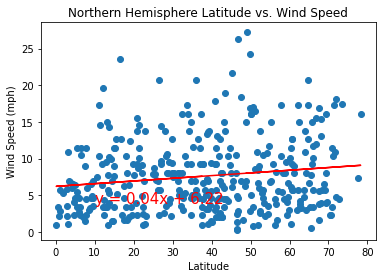

In [118]:
#Scatter plot for for Latitude and Wind Speed (Northern Hemisphere) with Linear Regression

NortherHem_data = city_data.loc[city_data["Lat"] > 0, [
    "Lat", "WindSpeed"]]

x_values = NortherHem_data["Lat"]
y_values = NortherHem_data["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")

#Chart Image
plt.savefig("11. NH_WindSpeed_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00989108290312889


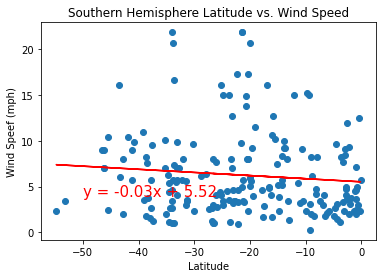

In [119]:
#Scatter plot for for Latitude and Wind Speed (Southern Hemisphere) with Linear Regression

SouthernHem_data = city_data.loc[city_data["Lat"] < 0, [
    "Lat", "WindSpeed"]]

x_values = SouthernHem_data["Lat"]
y_values = SouthernHem_data["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speef (mph)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,4),fontsize=15,color="red")

#Chart Image
plt.savefig("12. SH_WindSpeed_vs_Latitude.png")
print(f"The r-squared is: {rvalue**2}")